<a href="https://colab.research.google.com/github/albope/master-data-analytics-content/blob/master/NCTU_CNN_Kaggle_Challenge_fastai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification challenge

During next hours we will compete to build a classifier of natural scenes using a [dataset provided by NCTU](https://www.kaggle.com/c/cs-ioc5008-hw1/overview) (National Chiao Tung University, Taiwan).

[Leaderboard](https://www.kaggle.com/c/cs-ioc5008-hw1/leaderboard)

# Don't forget to configure the execution environment to run in GPU

## Download images from Google Drive

In [0]:
# Import Google Drive libraries
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
# Authenticate with your Google Account
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
# Download the dataset of the challenge
download = drive.CreateFile({'id': '1DeEJ_LtbgIYPLYcPu3bD818iKXH_w8ru'})
download.GetContentFile('challenge.zip')

In [0]:
# Extract the files
import zipfile
from pathlib import Path
data_path = Path("./challenge.zip")

with zipfile.ZipFile(str(data_path), 'r') as zip_ref:
    zip_ref.extractall("./data")

In [0]:
ls

adc.json  challenge.zip  data/  sample_data/


In [0]:
ls data

test/  train/


In [0]:
ls data/train

bedroom/  highway/     livingroom/  opencountry/  tallbuilding/
coast/    insidecity/  mountain/    street/
forest/   kitchen/     office/      suburb/


In [0]:
ls data/train/bedroom

image_0000.jpg  image_0028.jpg  image_0056.jpg  image_0084.jpg  image_0112.jpg
image_0001.jpg  image_0029.jpg  image_0057.jpg  image_0085.jpg  image_0113.jpg
image_0002.jpg  image_0030.jpg  image_0058.jpg  image_0086.jpg  image_0114.jpg
image_0003.jpg  image_0031.jpg  image_0059.jpg  image_0087.jpg  image_0115.jpg
image_0004.jpg  image_0032.jpg  image_0060.jpg  image_0088.jpg  image_0116.jpg
image_0005.jpg  image_0033.jpg  image_0061.jpg  image_0089.jpg  image_0117.jpg
image_0006.jpg  image_0034.jpg  image_0062.jpg  image_0090.jpg  image_0118.jpg
image_0007.jpg  image_0035.jpg  image_0063.jpg  image_0091.jpg  image_0119.jpg
image_0008.jpg  image_0036.jpg  image_0064.jpg  image_0092.jpg  image_0120.jpg
image_0009.jpg  image_0037.jpg  image_0065.jpg  image_0093.jpg  image_0121.jpg
image_0010.jpg  image_0038.jpg  image_0066.jpg  image_0094.jpg  image_0122.jpg
image_0011.jpg  image_0039.jpg  image_0067.jpg  image_0095.jpg  image_0123.jpg
image_0012.jpg  image_0040.jpg  image_0068.jpg  imag

In [0]:
ls data/test

image_0000.jpg  image_0208.jpg  image_0416.jpg  image_0624.jpg  image_0832.jpg
image_0001.jpg  image_0209.jpg  image_0417.jpg  image_0625.jpg  image_0833.jpg
image_0002.jpg  image_0210.jpg  image_0418.jpg  image_0626.jpg  image_0834.jpg
image_0003.jpg  image_0211.jpg  image_0419.jpg  image_0627.jpg  image_0835.jpg
image_0004.jpg  image_0212.jpg  image_0420.jpg  image_0628.jpg  image_0836.jpg
image_0005.jpg  image_0213.jpg  image_0421.jpg  image_0629.jpg  image_0837.jpg
image_0006.jpg  image_0214.jpg  image_0422.jpg  image_0630.jpg  image_0838.jpg
image_0007.jpg  image_0215.jpg  image_0423.jpg  image_0631.jpg  image_0839.jpg
image_0008.jpg  image_0216.jpg  image_0424.jpg  image_0632.jpg  image_0840.jpg
image_0009.jpg  image_0217.jpg  image_0425.jpg  image_0633.jpg  image_0841.jpg
image_0010.jpg  image_0218.jpg  image_0426.jpg  image_0634.jpg  image_0842.jpg
image_0011.jpg  image_0219.jpg  image_0427.jpg  image_0635.jpg  image_0843.jpg
image_0012.jpg  image_0220.jpg  image_0428.jpg  imag

# Let's hack some code!

# Explore the data

In [0]:

# Import fastai
from fastai.vision import *

In [0]:
batch_size = 48
size = 224
data = ImageDataBunch.from_folder(path="./data", train="train", test="test", 
                                  valid_pct=0.2, 
                                  ds_tfms=get_transforms(), size=size, 
                                  bs=batch_size
                                  ).normalize(imagenet_stats)

In [0]:
# Show classes
data.classes

['bedroom',
 'coast',
 'forest',
 'highway',
 'insidecity',
 'kitchen',
 'livingroom',
 'mountain',
 'office',
 'opencountry',
 'street',
 'suburb',
 'tallbuilding']

In [0]:

print(len(data.classes))

13


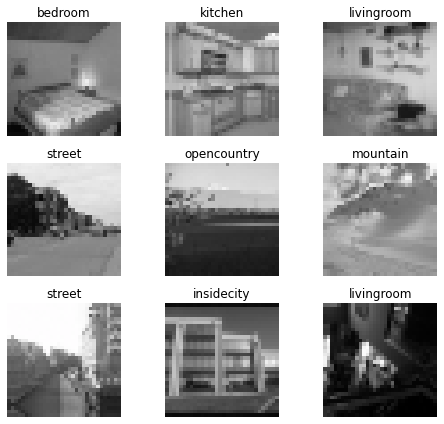

In [0]:
# Show samples of data
data.show_batch(rows=3, figsize=(7,6))

In [0]:
# Initialize learner
learn = cnn_learner(data, models.resnet34, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [0]:

# Configure learner with new data and freeze conv layers
learn.data = data
learn.freeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


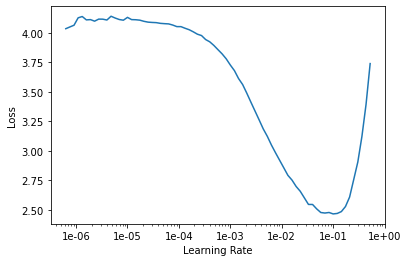

In [0]:
# Find learning rate
learn.lr_find()
learn.recorder.plot()

In [0]:

# Set learning rate
lr = 2e-4

In [0]:
# Train 5 epochs
learn.fit_one_cycle(5, max_lr=slice(lr))

epoch,train_loss,valid_loss,accuracy,time
0,3.591195,2.091342,0.303730,00:18
1,2.371818,0.772107,0.735346,00:18
2,1.595822,0.549121,0.813499,00:17
3,1.201182,0.495505,0.829485,00:18
4,1.044426,0.481929,0.831261,00:18


In [0]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


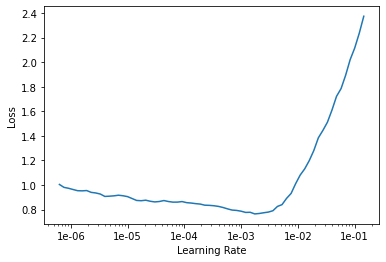

In [0]:
# Find learning rate
learn.lr_find()
learn.recorder.plot()

In [0]:

# Set learning rate
lr = 2e-6

In [0]:
# Train 7 epochs
learn.fit_one_cycle(7, max_lr=slice(lr/100,lr))

epoch,train_loss,valid_loss,accuracy,time
0,0.919500,0.483256,0.827709,00:19
1,0.919445,0.481394,0.838366,00:18
2,0.886047,0.479507,0.838366,00:18
3,0.933171,0.478373,0.829485,00:19
4,0.882854,0.475222,0.838366,00:18
5,0.868028,0.471696,0.838366,00:18
6,0.882950,0.469339,0.838366,00:19


In [0]:
#other model with NEW LEARNER
learn = cnn_learner(data, models.resnet18, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth


In [0]:

# Configure learner with new data and freeze conv layers
learn.data = data
learn.freeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


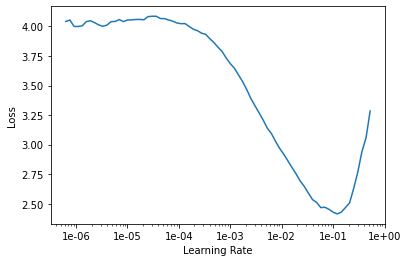

In [0]:
# Find learning rate
learn.lr_find()
learn.recorder.plot()

In [0]:
# Set learning rate
lr = 2e-7

In [0]:
# Train 8 epochs
learn.fit_one_cycle(8, max_lr=slice(1e-3, 1e-2))

epoch,train_loss,valid_loss,accuracy,time
0,0.620023,0.379954,0.875666,00:17
1,0.594692,0.465373,0.868561,00:18
2,0.640067,0.488334,0.870337,00:17
3,0.548728,0.323612,0.916519,00:17
4,0.447811,0.300881,0.921847,00:17
5,0.321546,0.251219,0.930728,00:17
6,0.241559,0.257478,0.930728,00:17
7,0.189331,0.250617,0.936057,00:17


In [0]:
learner = create_cnn(data, models.resnet18, metrics=[accuracy], callback_fns=ShowGraph)
interpreter = ClassificationInterpretation.from_learner(learner)
interpreter.most_confused(min_val=2)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7f19e5989a58>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 961, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 941, in _shutdown_workers
    w.join()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 122, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process
Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7f19e5989a58>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 961, in __del__
    self._shutdown_workers()
  File "/usr/local/l

[('opencountry', 'forest', 68),
 ('mountain', 'forest', 47),
 ('coast', 'forest', 36),
 ('livingroom', 'forest', 23),
 ('tallbuilding', 'livingroom', 21),
 ('tallbuilding', 'forest', 20),
 ('suburb', 'forest', 19),
 ('kitchen', 'forest', 16),
 ('street', 'coast', 16),
 ('highway', 'coast', 15),
 ('highway', 'forest', 15),
 ('tallbuilding', 'coast', 14),
 ('bedroom', 'forest', 13),
 ('street', 'forest', 13),
 ('insidecity', 'forest', 12),
 ('office', 'forest', 11),
 ('insidecity', 'tallbuilding', 10),
 ('mountain', 'coast', 8),
 ('insidecity', 'livingroom', 7),
 ('kitchen', 'tallbuilding', 7),
 ('office', 'livingroom', 7),
 ('office', 'tallbuilding', 7),
 ('street', 'livingroom', 7),
 ('bedroom', 'coast', 6),
 ('forest', 'coast', 6),
 ('livingroom', 'coast', 6),
 ('office', 'coast', 6),
 ('coast', 'office', 5),
 ('coast', 'tallbuilding', 5),
 ('highway', 'livingroom', 5),
 ('insidecity', 'coast', 5),
 ('kitchen', 'coast', 5),
 ('opencountry', 'coast', 5),
 ('suburb', 'livingroom', 5),
 

In [0]:
learn.unfreeze()

Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7f19e5989a58>>
Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7f19e5989a58>>
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 961, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 941, in _shutdown_workers
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 961, in __del__
    w.join()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 122, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
    self._shutdown_workers()
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/da

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


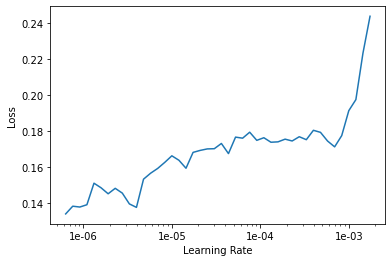

In [0]:
# Find learning rate
learn.lr_find()
learn.recorder.plot()

In [0]:
# Train 12 epochs
learn.fit_one_cycle(12, max_lr=slice(1e-4, 1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.163186,0.249555,0.927176,00:18
1,0.178596,0.386774,0.911190,00:19
2,0.288761,0.433079,0.895204,00:19
3,0.313168,0.548434,0.877442,00:18
4,0.241059,0.329890,0.923623,00:18
5,0.198882,0.420067,0.888099,00:18
6,0.154577,0.317282,0.920071,00:18
7,0.106093,0.301619,0.923623,00:18
8,0.070906,0.287690,0.937833,00:18
9,0.053247,0.271714,0.939609,00:18


In [0]:
learn.save('stage-resnet18')

In [0]:
#new learner
# Initialize learner
learn = cnn_learner(data, models.resnet50, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [0]:
# Configure learner with new data and freeze conv layers
learn.data = data
learn.freeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


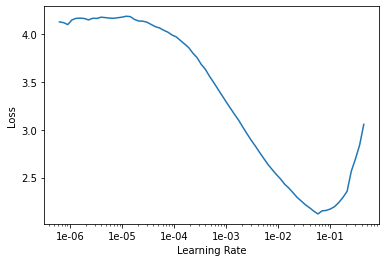

In [0]:
# Find learning rate
learn.lr_find()
learn.recorder.plot()

In [0]:
# Train 8 epochs
learn.fit_one_cycle(8, max_lr=slice(1e-4, 1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,1.978235,0.493319,0.841918,00:20
1,0.997489,0.363012,0.893428,00:19
2,0.644908,0.340289,0.895204,00:19
3,0.458432,0.288561,0.912966,00:19
4,0.359538,0.250284,0.916519,00:19
5,0.248035,0.272041,0.927176,00:19
6,0.203316,0.261219,0.916519,00:19
7,0.168078,0.259162,0.921847,00:19


In [0]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


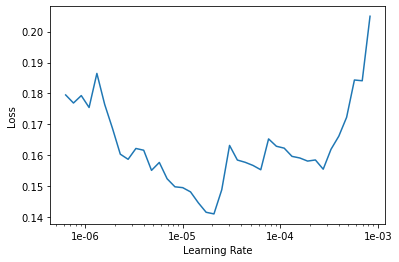

In [0]:
# Find learning rate
learn.lr_find()
learn.recorder.plot()

In [0]:
# Train 15 epochs
learn.fit_one_cycle(15, max_lr=slice(1e-5, 1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.153520,0.255495,0.921847,00:20
1,0.150353,0.247386,0.927176,00:20
2,0.141753,0.240541,0.934281,00:20
3,0.124637,0.275845,0.930728,00:20
4,0.115823,0.264269,0.944938,00:20
5,0.098472,0.229224,0.943162,00:20
6,0.083447,0.201437,0.946714,00:20
7,0.060874,0.192703,0.957371,00:20
8,0.053513,0.193707,0.957371,00:20
9,0.045212,0.196565,0.957371,00:21


In [0]:
learner = create_cnn(data, models.resnet50, metrics=[accuracy], callback_fns=ShowGraph)
interpreter = ClassificationInterpretation.from_learner(learner)
interpreter.most_confused(min_val=2)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


[('opencountry', 'mountain', 51),
 ('tallbuilding', 'highway', 38),
 ('coast', 'mountain', 36),
 ('highway', 'mountain', 31),
 ('office', 'highway', 29),
 ('livingroom', 'highway', 27),
 ('mountain', 'highway', 26),
 ('street', 'mountain', 25),
 ('insidecity', 'highway', 24),
 ('tallbuilding', 'mountain', 23),
 ('suburb', 'highway', 21),
 ('bedroom', 'highway', 20),
 ('forest', 'highway', 18),
 ('kitchen', 'highway', 18),
 ('opencountry', 'highway', 18),
 ('mountain', 'kitchen', 17),
 ('forest', 'mountain', 16),
 ('kitchen', 'mountain', 16),
 ('coast', 'highway', 14),
 ('insidecity', 'mountain', 14),
 ('street', 'highway', 13),
 ('suburb', 'mountain', 9),
 ('coast', 'kitchen', 7),
 ('opencountry', 'kitchen', 7),
 ('mountain', 'office', 6),
 ('office', 'mountain', 5),
 ('bedroom', 'kitchen', 3),
 ('livingroom', 'mountain', 3),
 ('bedroom', 'mountain', 2),
 ('street', 'kitchen', 2)]